In [124]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.pyplot import bar
import skimage.io as io
from skimage.exposure import histogram

from skimage.filters import gaussian


def cartoonize(image):
    if (len(image.shape) == 3) and (image.shape[2] == 4):
        image = image[:, :, 0:3]
    if len(image.shape) != 2:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gray = cv2.medianBlur(gray, 3)
    else:
        gray = image

    edges = cv2.adaptiveThreshold(
        gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 2
    )

    color = cv2.bilateralFilter(image, 9, 200, 200)
    cartoon = cv2.bitwise_and(color, color, mask=edges)
    cartoon = cv2.medianBlur(cartoon, 9)
    return cartoon

3
(332, 250, 4)


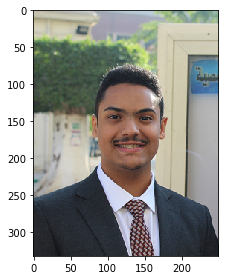

In [126]:
img = io.imread("Moganasundaram_001-750x0-c-default.jpg")
img = io.imread("260141058_327061272563343_1237411883340876619_n.jpg")
img = io.imread("photo-1601288496920-b6154fe3626a.jpg")
img = io.imread("4f1fa8ec-e6c8-4b8b-ba39-ba91a157539e.jpg")
img = io.imread("hairstyles-for-oval-faces.jpg")
img = io.imread("morphy-me-celebrity-face-mashups-15.jpg")
img = io.imread("maxresdefault.jpg")
img = io.imread("abdullah.png")

print(len(img.shape))
print(img.shape)
io.imshow(img)

I was Here


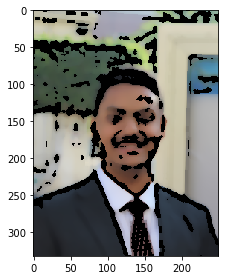

In [127]:
io.imshow( cartoonize(img ))